# Chapter 2 - A First Example

In [55]:
# Imports
from tensorflow.keras.datasets import mnist
from tensorflow import keras
from tensorflow.keras import layers

# Load data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [56]:
# Look at training data
display(train_images.shape)

display(len(train_labels))

display(train_labels)

(60000, 28, 28)

60000

array([5, 0, 4, ..., 5, 6, 8], shape=(60000,), dtype=uint8)

In [57]:
# Look at test data
display(test_images.shape)

display(len(test_labels))

display(test_labels)

(10000, 28, 28)

10000

array([7, 2, 1, ..., 4, 5, 6], shape=(10000,), dtype=uint8)

In [58]:
# Create a model
model = keras.Sequential([
    layers.Dense(512, activation='relu', input_shape=(28*28,)),
    layers.Dense(10, activation='softmax')
])

display(model)

/home/jonathan/Projects/deep_learning_with_python/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


<Sequential name=sequential_5, built=True>

In [59]:
# Compile the model
model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

display(model)

<Sequential name=sequential_5, built=True>

In [60]:
# Reshape the image data for modeling
train_images = train_images.reshape((60_000, 28*28))
train_images = train_images.astype("float32")/255
test_images = test_images.reshape((10_000, 28*28))
test_images = test_images.astype("float32")/255

display(train_images.shape)
display(test_images.shape)


(60000, 784)

(10000, 784)

In [61]:
# Fit the model

model.fit(train_images, train_labels, epochs=5, batch_size=128)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - accuracy: 0.8777 - loss: 0.4273
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9664 - loss: 0.1168
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.9796 - loss: 0.0693
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9857 - loss: 0.0502
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - accuracy: 0.9889 - loss: 0.0380


In [62]:
# Make predictions
test_digits = test_images[0:10]
predictions = model.predict(test_digits)
display(predictions[0])
display(predictions[0].argmax())
display(predictions[0][1])
test_labels[0]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step


array([2.4883892e-07, 6.9893766e-09, 5.9168473e-05, 6.7409484e-05,
       3.6960786e-12, 1.1957792e-07, 1.1984002e-11, 9.9985981e-01,
       9.3695007e-08, 1.3200848e-05], dtype=float32)

np.int64(7)

np.float32(6.9893766e-09)

np.uint8(7)

In [63]:
# Evaluate the Model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"test_acc: {test_acc}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9742 - loss: 0.0797
test_acc: 0.977400004863739


## Data representations with Tensors

In [4]:
# Rank 0 tensor
import numpy as np 
x = np.array(12)
display(x)
display(x.ndim)

array(12)

0

In [5]:
# Rank 1 Tensor
x = np.array([12,3,6,14,7])
display(x)
display(x.ndim)

array([12,  3,  6, 14,  7])

1

In [7]:
# Rank 2 Tensor
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1]])
display(x)
display(x.ndim)

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1]])

2

In deep learning you will typically manipulate tensors with dimension 0 to 4, but you may
on occasion go to 5 if you are working with video data.

Tensors are defined by:

- Number of axes (ie rank)
- Shape (describes the dimensions)
- Data type (float16, float32)



In [8]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [9]:
train_images.ndim

3

In [10]:
train_images.shape

(60000, 28, 28)

In [11]:
train_images.dtype

dtype('uint8')

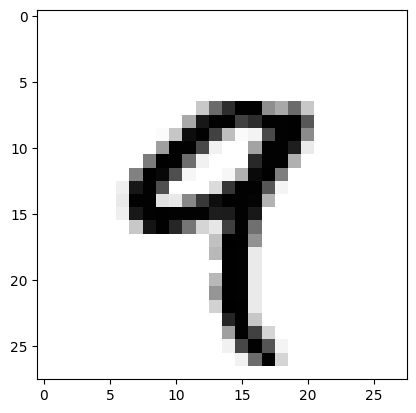

np.uint8(9)

In [15]:
import matplotlib.pyplot as plt 
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

display(train_labels[4])

### Manipulating Tensors in Numpy

In [16]:
my_slice = train_images[10:100]
my_slice.shape

(90, 28, 28)

In [17]:
my_slice = train_images[10:100, :, :]
display(my_slice.shape)
my_slice = train_images[10:100, 0:28, 0:28]
display(my_slice.shape)

(90, 28, 28)

(90, 28, 28)

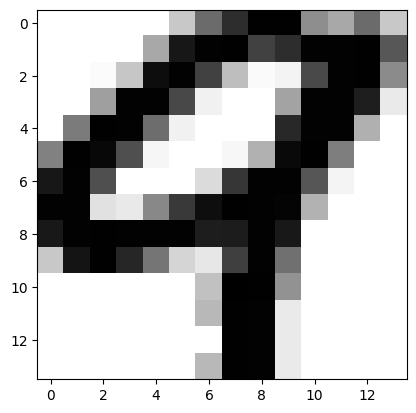

In [19]:
my_slice = train_images[:, 14:, 14:]
plt.imshow(my_slice[4], cmap=plt.cm.binary)
my_slice = train_images[:, 7:-7, 7:-7]
plt.imshow(my_slice[4], cmap=plt.cm.binary)

 You can see that you can use these operations to essentially crop the in images
 etc.

 ### Notion of data batches

 - The first axis will generally be the samples axis
 - In the example above the samples are images
 - The dataset is rarely processsed all at once
 - It is typically processed in batches
 - In our case the batch size is 128

In [20]:
batch0 = train_images[:128]
batch1 = train_images[128:256]

n = 3
batchn = train_images[128*n:128*(n+1)]

## Real world examples of tensors

- Vector (tabular) Data: Rank 2, (samples, features), where each sample is a vector
  of numerical attributes
- Time Series: Rank 3, (samples, timesteps, features)
- Images: Rank 4, (samples, height, width, channels), each pixes is representated by a vector
  of values
- Video: Rank 5, (samples, frames, heights, width, channels), where each sample is a sequence of frames

## The gears of neural networks: Tensor operations

In [21]:
import keras

### A Dense layer

```python
keras.layers.Dense(512, activation='relu')
```

- This is a function that takes an input matrix and returns another matrix

```python
output = relu(dot(input, W) + b)
```
There are three tensor operations here

- a dot product
- tensor addition
- a relu operation, $max(x, 0)$.

#### Elementwise Operations

Note the $relu$ and $+$ are elementwise operations, while the dot is a matrix operation

- There is elementwise addition, subtraction, multiplication, ...

#### Dot Products

Same as in matrix algebra

#### Tensor reshaping

The operation of reshaping a matrix/tensor

In [25]:
train_images = train_images.reshape((60_000, 28*28))
x = np.array([[0., 1.],
              [2., 3.],
              [4., 5.]])
display(x.shape)

x = x.reshape((6,1))
display(x)
display(x.shape)

x = x.reshape((2,3))
display(x)
display(x.shape)

(3, 2)

array([[0.],
       [1.],
       [2.],
       [3.],
       [4.],
       [5.]])

(6, 1)

array([[0., 1., 2.],
       [3., 4., 5.]])

(2, 3)

#### Transposition

This just transposes the matrix/tensor

In [27]:
x = np.zeros((300, 20))
x = np.transpose(x)
x.shape

(20, 300)

### Geometric Interpretations of tensor operations

- Tensor addition acts like a translation of an object to a new position, without
  distoring the object

$$
\begin{bmatrix}HorizontalFactor \\
               VerticalFactor
\end{bmatrix} + 
\begin{bmatrix}x \\
               y
\end{bmatrix}
$$

- Rotation (counterclockwise): a dot product with 
$$R = \begin{bmatrix}cos(\theta) & -sin(\theta) \\
                     sin(\theta) & cos(\theta)
      \end{bmatrix} \cdot 
      \begin{bmatrix}x \\
                     y
      \end{bmatrix}
$$

- Scaling: Vertical and horizontal scaling can be achieve with a diagonal matrix

$$
S = \begin{bmatrix}
    HorizontalFactor & 0 \\
    0 & VerticalFactor
    \end{bmatrix} \cdot 
    \begin{bmatrix}
    x \\
    y
    \end{bmatrix}
$$

- Linear Transform: A dot product with an arbitrary matrix. This encompasses scaling
  and rotation
- Affine transform: The combination of a linear transform and a translation. Note
  $y = W \cdot x + b$ is affine. Note that an affine transform of an affine transform
  is an affine transform. This means that neural networks w/o activation functions
  would just be linear models in disguise.
  